In [1]:
import matplotlib.pyplot as plt
import cv2
from darkflow.net.build import TFNet


%config InlineBackend.figure_format = 'svg'

c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\

In [43]:
options = {
    'model': 'cfg/yolov2-tiny.cfg',
    'load' : 'bin/yolov2-tiny.weights',
    'threshold':0.3,
    }
tfnet = TFNet(options)

Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny.cfg
Loading bin/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.013964414596557617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky   

In [48]:
    img = cv2.imread('000014.jpg')
    result = tfnet.return_predict(img)
    print(result)
#result
    

[{'label': 'car', 'confidence': 0.3231177, 'topleft': {'x': 239, 'y': 134}, 'bottomright': {'x': 280, 'y': 164}}, {'label': 'car', 'confidence': 0.37007418, 'topleft': {'x': 308, 'y': 135}, 'bottomright': {'x': 346, 'y': 160}}, {'label': 'car', 'confidence': 0.57231116, 'topleft': {'x': 221, 'y': 163}, 'bottomright': {'x': 291, 'y': 196}}, {'label': 'car', 'confidence': 0.5031868, 'topleft': {'x': 414, 'y': 140}, 'bottomright': {'x': 508, 'y': 203}}, {'label': 'car', 'confidence': 0.4107352, 'topleft': {'x': 586, 'y': 219}, 'bottomright': {'x': 733, 'y': 324}}, {'label': 'car', 'confidence': 0.45091188, 'topleft': {'x': 375, 'y': 346}, 'bottomright': {'x': 531, 'y': 427}}, {'label': 'car', 'confidence': 0.41966653, 'topleft': {'x': 783, 'y': 364}, 'bottomright': {'x': 955, 'y': 493}}, {'label': 'car', 'confidence': 0.4030093, 'topleft': {'x': 512, 'y': 447}, 'bottomright': {'x': 706, 'y': 532}}, {'label': 'bus', 'confidence': 0.4268856, 'topleft': {'x': 601, 'y': 217}, 'bottomright': {

(239, 134) (280, 164)
(308, 135) (346, 160)
(221, 163) (291, 196)
(414, 140) (508, 203)
(586, 219) (733, 324)
(375, 346) (531, 427)
(783, 364) (955, 493)
(512, 447) (706, 532)


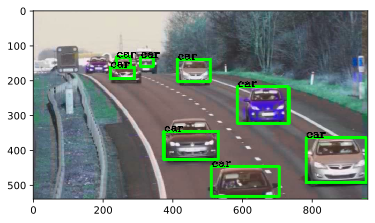

In [49]:

for i in range(0,len(result)):
    tl = (result[i]['topleft']['x'],result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'],result[i]['bottomright']['y'])# gives the topleft and bottom right coordinates
    label = result[i]['label']
    if label == "car":
        print(tl,br)

        img = cv2.rectangle(img, tl, br,(0,255,0),7) #draw a green rectangle
        img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)

        plt.imshow(img)
plt.show()